<a href="https://colab.research.google.com/github/dipayandas97/Spiking-Neural-Network/blob/master/Self_Organizing_Map_on_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_iris
import numpy as np

iris_dataset = load_iris()
X = iris_dataset.data[:, :4] 
labels = iris_dataset.target
print(X.shape, labels.shape)

(150, 4) (150,)


In [0]:
A, B, m = 30,30,4 #input shape = (mx1), here (4x1)
SOM = np.random.random_sample(size=(A,B,m))

In [0]:
def eucledian_dist(v1, v2):
    d = 0
    #for 1D vectors only
    for i in range(v1.shape[0]):
        d += (v1[i] - v2[i]) ** 2
    return d

In [0]:
def manhatten_dist(x1,y1, x2,y2):
    del_x = (x1-x2) if x1>x2 else (x2-x1)
    del_y = (y1-y2) if y1>y2 else (y2-y1)
    
    return (del_x + del_y)

In [0]:
def closest_node(input_vector, SOM):
    min_dist_found = 99999
    min_dist_x, min_dist_y = -1,-1

    for i in range(SOM.shape[0]):
        for j in range(SOM.shape[1]):
            d = eucledian_dist(input_vector, SOM[i][j])
            if d < min_dist_found:
                min_dist_found = d
                min_dist_x, min_dist_y = i,j
    return min_dist_x, min_dist_y

In [0]:
epochs = 5000
LR = 0.5
max_dist = (A+B)

for t in range(epochs):
    if t % (epochs/10)==0: print(t)

    part_left = 1 - (t* 1.0 / epochs)
    curr_lr = LR * part_left                            #Current LR
    curr_max_dist = (int)(max_dist * part_left)         #Current range/radius of neighbourhood

    n = np.random.randint(len(X))

    bmu_x, bmu_y = closest_node(X[n], SOM)

    for i in range(SOM.shape[0]):
        for j in range(SOM.shape[1]):
            if manhatten_dist(i,j, bmu_x, bmu_y) < curr_max_dist:
                SOM[i][j] += curr_lr * (X[n] - SOM[i][j])

0
500
1000
1500
2000
2500
3000
3500
4000
4500


In [0]:
u_map = np.empty(shape=(A,B), dtype=np.float)

In [0]:
for i in range(u_map.shape[0]):
    for j in range(u_map.shape[1]):
        d = 0
        if i-1 >= 0:
            d += eucledian_dist(SOM[i][j], SOM[i-1][j])
        if i+1 < A:
            d += eucledian_dist(SOM[i][j], SOM[i+1][j])
        if j-1 >= 0:
            d += eucledian_dist(SOM[i][j], SOM[i][j-1])
        if j+1 < B:
            d += eucledian_dist(SOM[i][j], SOM[i][j+1])

        u_map[i][j] = d / 4

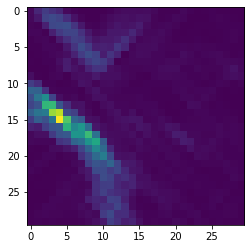

In [0]:
plt.imshow(u_map)

In [0]:
mapping = np.empty(shape=(A,B), dtype=object)
for i in range(mapping.shape[0]):
    for j in range(mapping.shape[1]):
        mapping[i][j] = []

for t in range(len(X)):
    x,y = closest_node(X[t], SOM)
    mapping[x][y].append(labels[t]+1) #Labels : 1,2,3

In [0]:
def most_common(ls):
    u_elements, u_count = np.unique(np.asarray(ls), return_counts=True)
    max_count_pos = np.argmax(u_count, axis=-1)
    return u_elements[max_count_pos]

In [0]:
label_map = np.zeros((A,B)) 
for i in range(label_map.shape[0]):
    for j in range(label_map.shape[1]):
        label_map[i][j] = most_common(mapping[i][j]) if mapping[i][j] != [] else 0

In [0]:
np.unique(label_map, return_counts=True)

(array([0., 1., 2., 3.]), array([773,  38,  47,  42]))

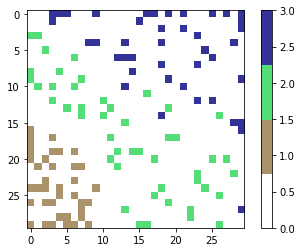

In [0]:
plt.imshow(label_map, cmap=plt.cm.get_cmap('terrain_r', 4))
plt.colorbar()
plt.show()